**SEE:** https://github.com/BruntonUWBio/mining2021
**SEE:** https://github.com/BruntonUWBio/mining2021/blob/master/Manuscript_ECoG_Event_Join.ipynb

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mne

In [22]:
data_dir = Path('../data/12509831/')
patient_id = 'fcb01f7a'
day = 3
cache_prefix = Path(data_dir, 'ecog_mvti_length', f"{patient_id}_{day}/")
metadata_fname = Path(data_dir, 'ecog_metadata', f'ecog_metadata_{patient_id}.csv')
metadata_df = pd.read_csv(metadata_fname)
electrode_ids = np.arange(64) # 8 x 8 grid
metadata_df.head()

,Unnamed: 0,SD_channels,Kurt_channels,standardizeDenoms,goodChanInds,X,Y,Z
0,GRID1,55.401712,65.871430,40.587315,0.0,27.220215,43.561681,46.997960
1,GRID2,34.755356,7.423794,30.262784,1.0,35.842660,39.351248,41.932104
2,GRID3,36.483765,7.193614,29.195583,1.0,44.547797,37.883354,32.067253
3,GRID4,45.498636,8.724970,35.890976,1.0,50.961388,34.988170,24.327016
4,GRID5,25.725548,9.942965,22.082772,1.0,56.492858,31.369087,12.757343


In [70]:
events = []
for f in cache_prefix.glob('*.npy'):
    events.append(np.expand_dims(np.load(f), 0))
events = np.concatenate(events)
events[np.isfinite(events) == False] = 0
events.shape

(316, 84, 500)

In [71]:
ch_names = metadata_df.iloc[:, 0].to_list()
info = mne.create_info(ch_names, ch_types='ecog', sfreq=500.)
info['bads'] = metadata_df.loc[metadata_df.goodChanInds != 1].iloc[:, 0].to_list()
info

<Info | 8 non-empty values
 bads: 17 items (GRID1, GRID41, GRID42, GRID44, GRID45, GRID46, GRID47, ...)
 ch_names: GRID1, GRID2, GRID3, GRID4, GRID5, GRID6, GRID7, GRID8, GRID9, ...
 chs: 84 ECoG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 84
 projs: []
 sfreq: 500.0 Hz
>

In [72]:
epochs = mne.EpochsArray(events, info, tmin=-0.5, baseline=None, verbose=False)
epochs = epochs.drop_channels(epochs.info['bads'])
epochs.drop_bad()
epochs

Number of events,316
Events,1: 316
Time range,-0.500 – 0.498 sec
Baseline,off


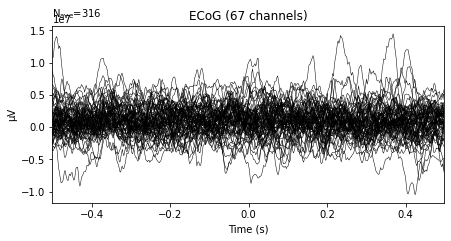

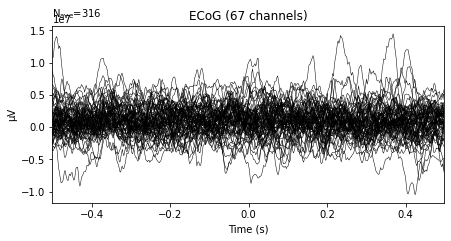

In [75]:
evoked = epochs.average()
evoked.plot()

    Using multitaper spectrum estimation with 7 DPSS windows


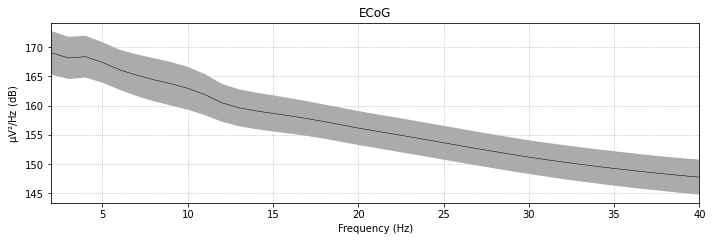

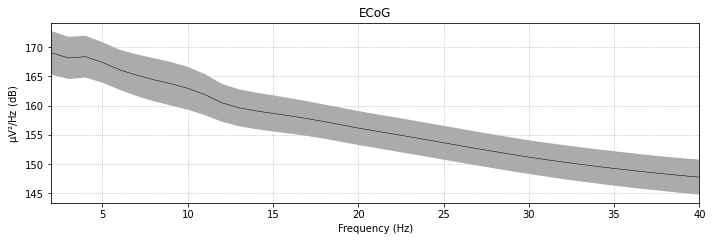

In [85]:
epochs.plot_psd(fmin=2., fmax=40., average=True, spatial_colors=False)

In [104]:
freqs = np.logspace(*np.log10([4, 150]), num=120)
average_tfr = mne.time_frequency.tfr_morlet(
    evoked, freqs, n_cycles = freqs / 2., use_fft=True, return_itc=False, verbose=False)

Applying baseline correction (mode: mean)


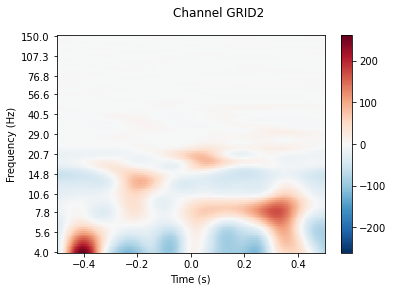

Applying baseline correction (mode: mean)


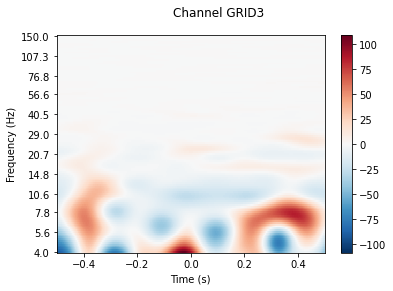

Applying baseline correction (mode: mean)


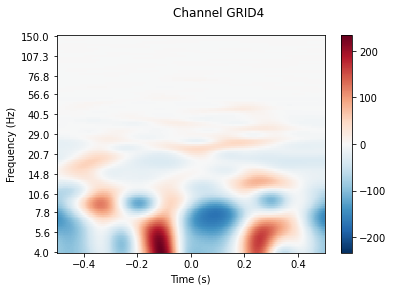

Applying baseline correction (mode: mean)


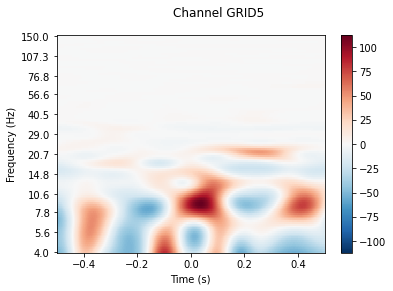

Applying baseline correction (mode: mean)


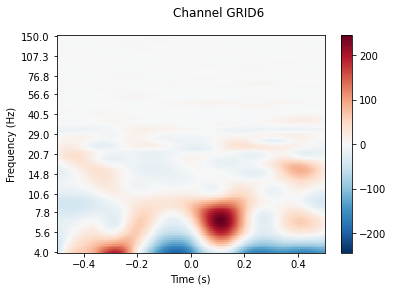

Applying baseline correction (mode: mean)


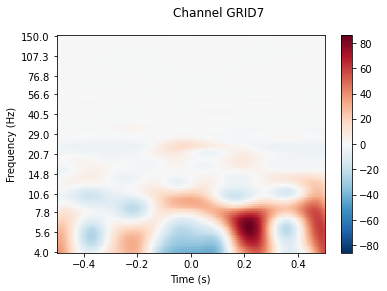

Applying baseline correction (mode: mean)


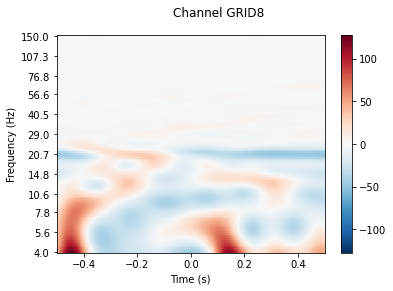

Applying baseline correction (mode: mean)


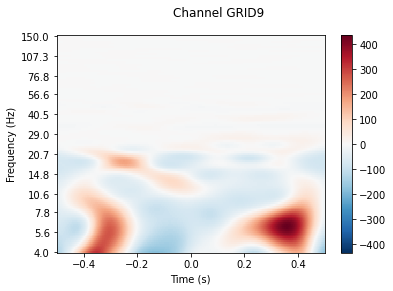

Applying baseline correction (mode: mean)


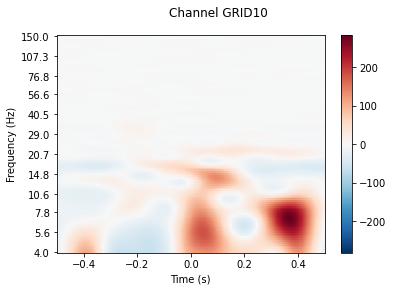

Applying baseline correction (mode: mean)


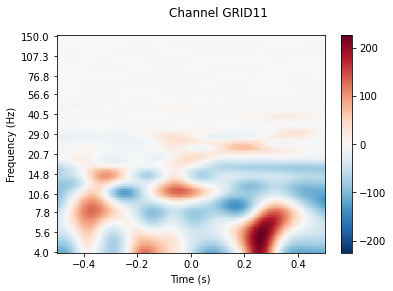

Applying baseline correction (mode: mean)


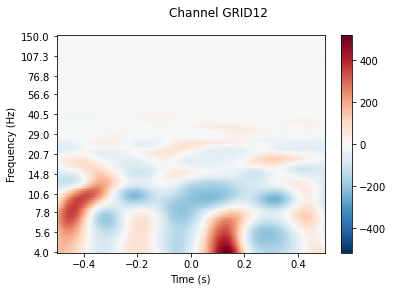

Applying baseline correction (mode: mean)


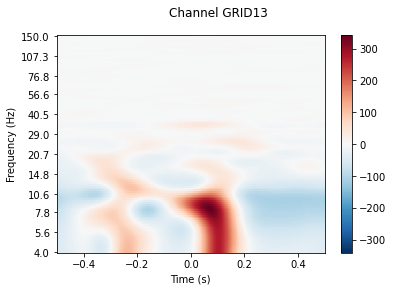

Applying baseline correction (mode: mean)


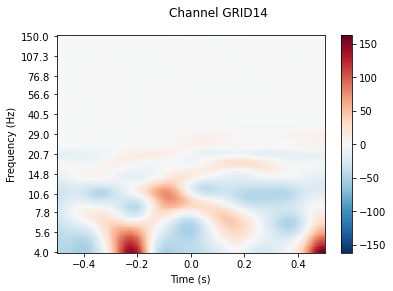

Applying baseline correction (mode: mean)


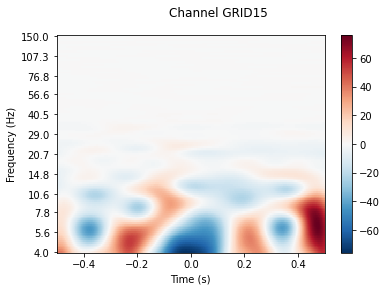

Applying baseline correction (mode: mean)


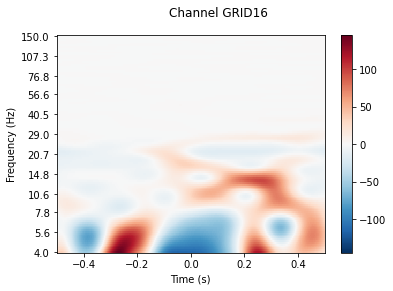

Applying baseline correction (mode: mean)


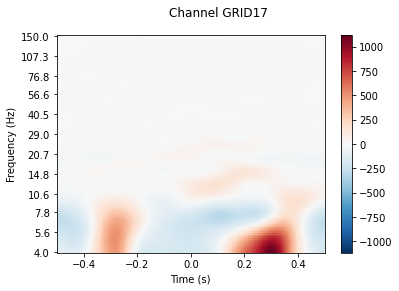

Applying baseline correction (mode: mean)


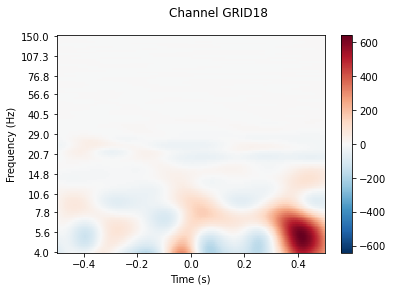

Applying baseline correction (mode: mean)


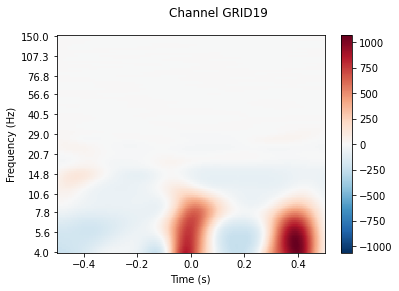

Applying baseline correction (mode: mean)


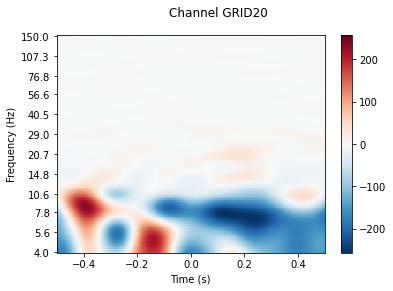

Applying baseline correction (mode: mean)


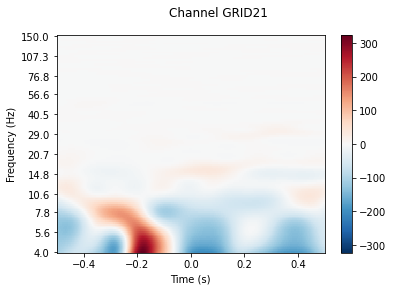

Applying baseline correction (mode: mean)


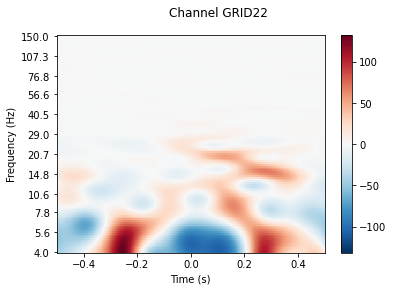

Applying baseline correction (mode: mean)


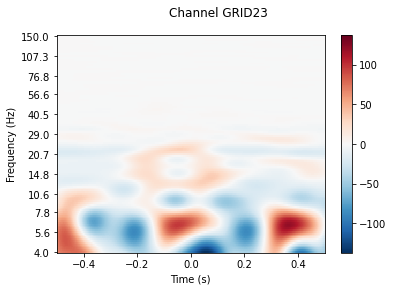

Applying baseline correction (mode: mean)


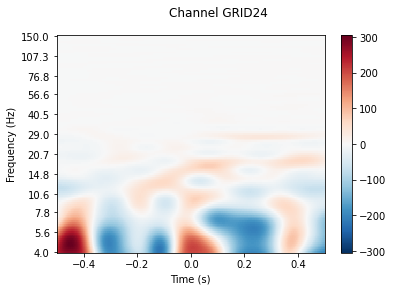

Applying baseline correction (mode: mean)


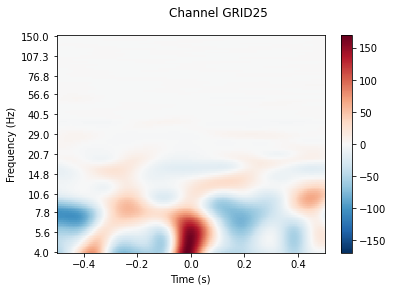

Applying baseline correction (mode: mean)


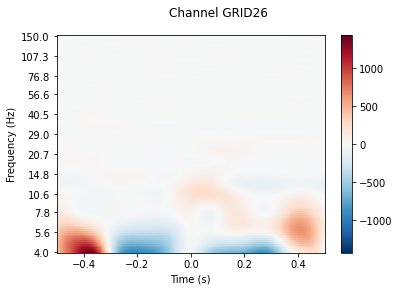

Applying baseline correction (mode: mean)


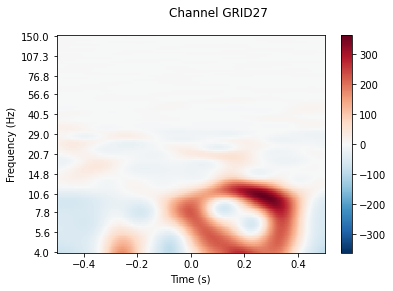

Applying baseline correction (mode: mean)


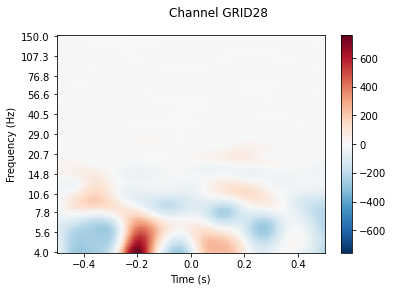

Applying baseline correction (mode: mean)


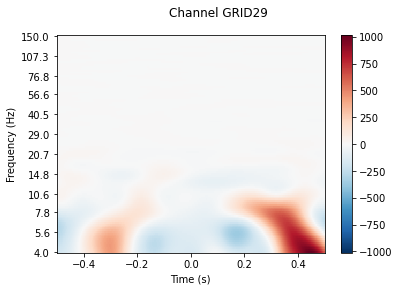

Applying baseline correction (mode: mean)


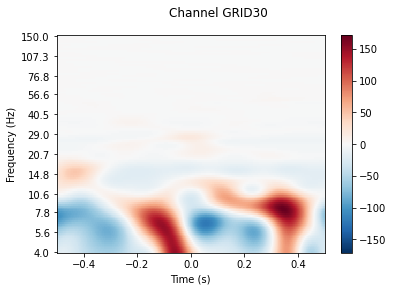

Applying baseline correction (mode: mean)


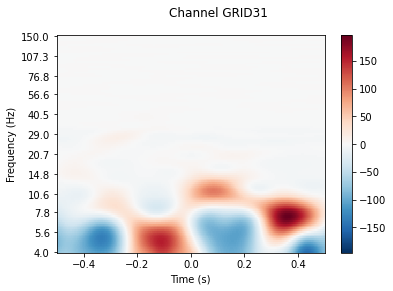

Applying baseline correction (mode: mean)


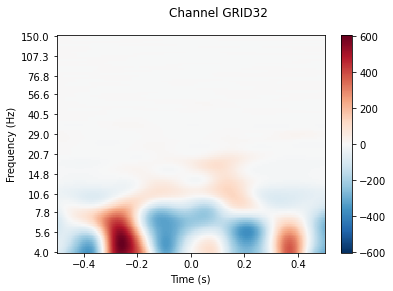

Applying baseline correction (mode: mean)


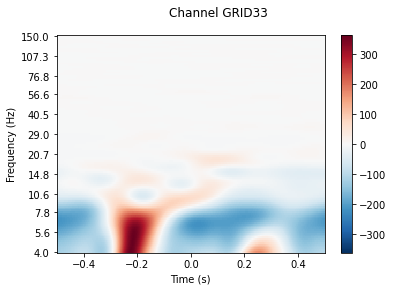

Applying baseline correction (mode: mean)


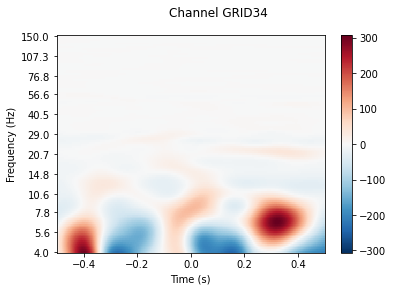

Applying baseline correction (mode: mean)


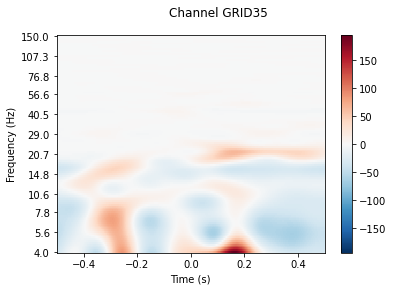

Applying baseline correction (mode: mean)


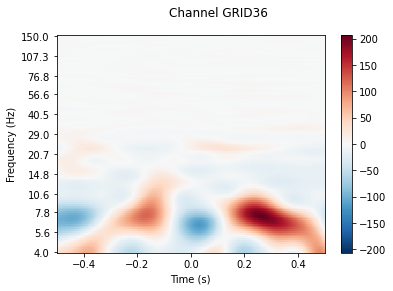

Applying baseline correction (mode: mean)


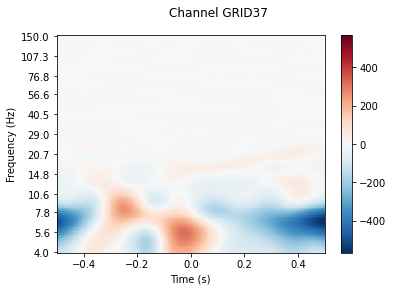

Applying baseline correction (mode: mean)


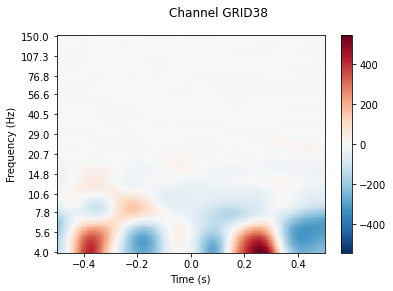

Applying baseline correction (mode: mean)


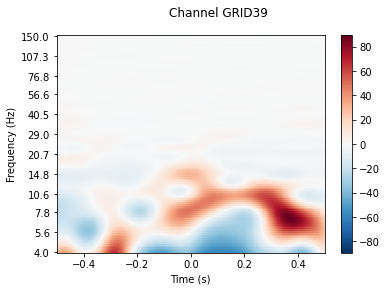

Applying baseline correction (mode: mean)


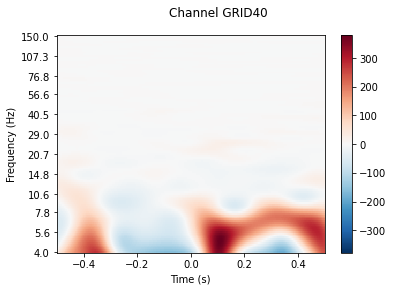

Applying baseline correction (mode: mean)


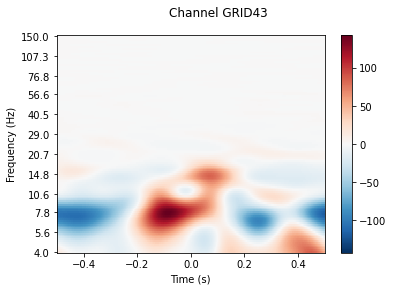

Applying baseline correction (mode: mean)


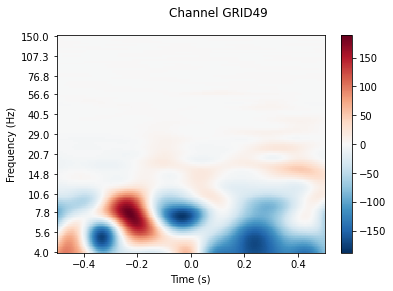

Applying baseline correction (mode: mean)


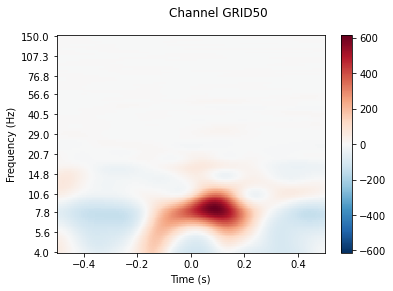

Applying baseline correction (mode: mean)


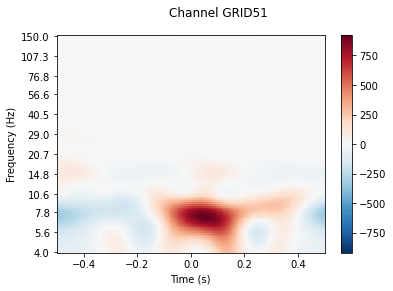

Applying baseline correction (mode: mean)


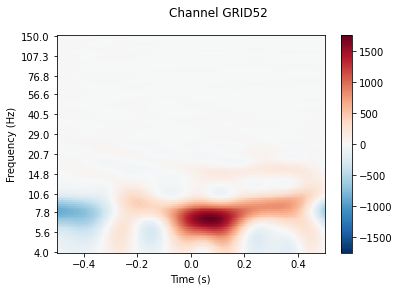

Applying baseline correction (mode: mean)


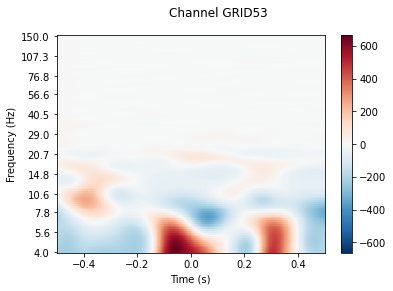

Applying baseline correction (mode: mean)


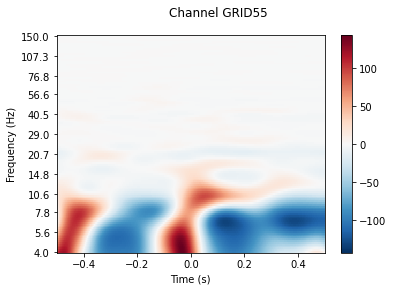

Applying baseline correction (mode: mean)


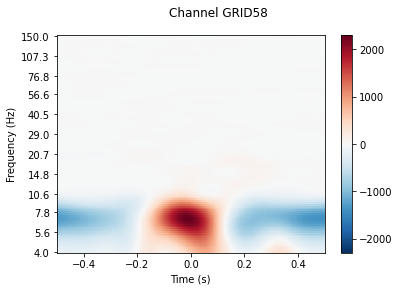

Applying baseline correction (mode: mean)


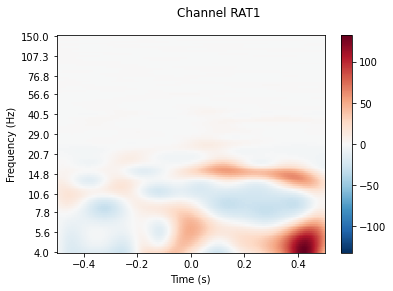

Applying baseline correction (mode: mean)


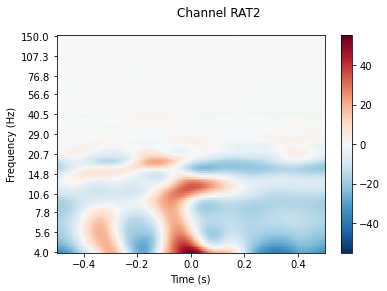

Applying baseline correction (mode: mean)


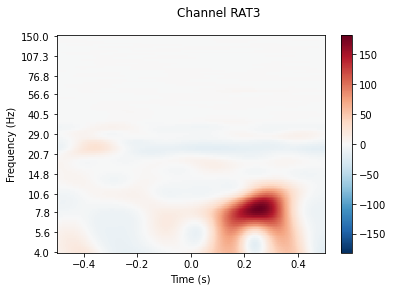

Applying baseline correction (mode: mean)


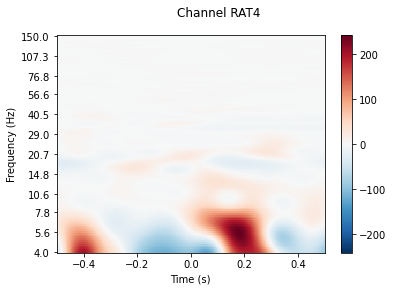

Applying baseline correction (mode: mean)


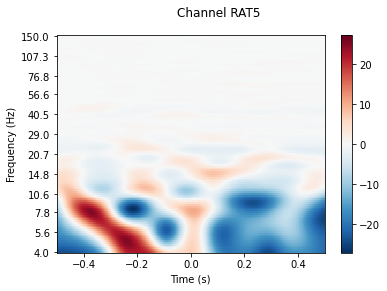

Applying baseline correction (mode: mean)


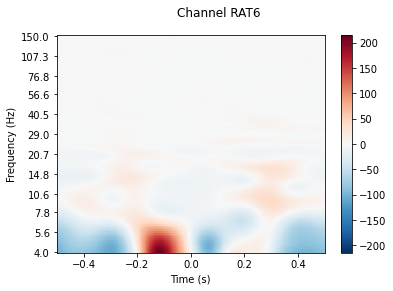

Applying baseline correction (mode: mean)


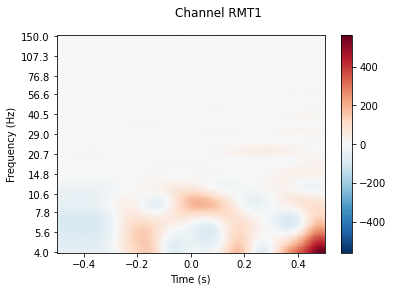

Applying baseline correction (mode: mean)


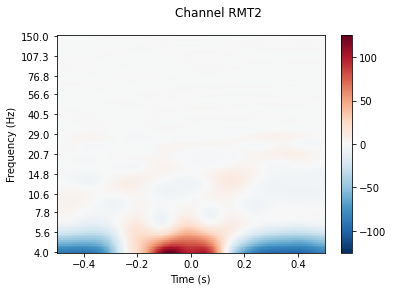

Applying baseline correction (mode: mean)


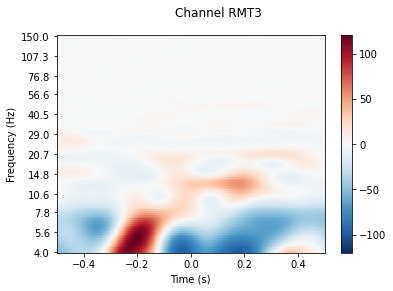

Applying baseline correction (mode: mean)


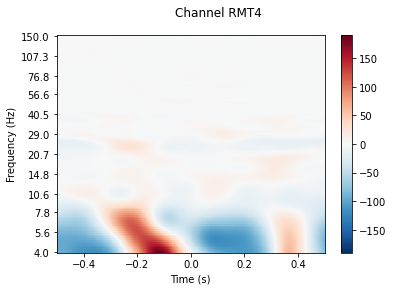

Applying baseline correction (mode: mean)


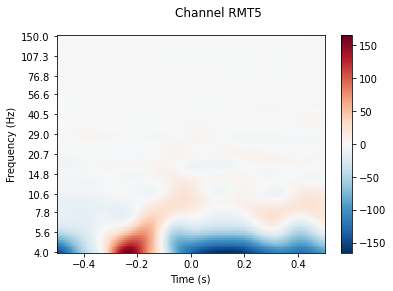

Applying baseline correction (mode: mean)


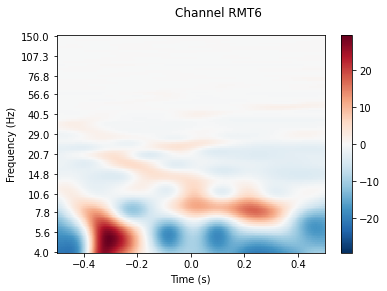

Applying baseline correction (mode: mean)


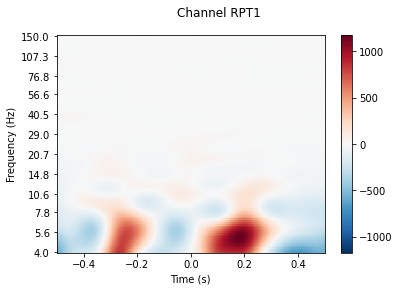

Applying baseline correction (mode: mean)


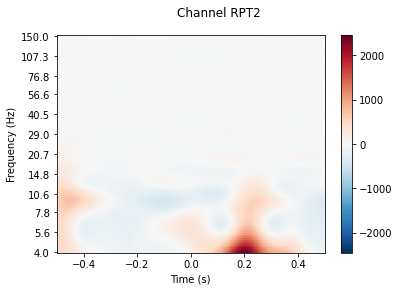

Applying baseline correction (mode: mean)


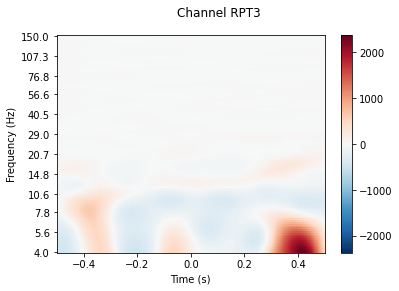

Applying baseline correction (mode: mean)


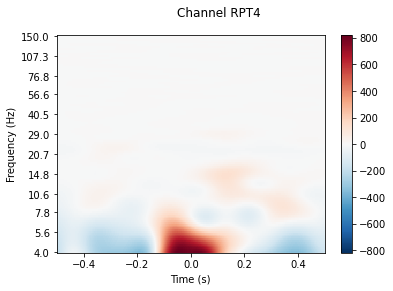

Applying baseline correction (mode: mean)


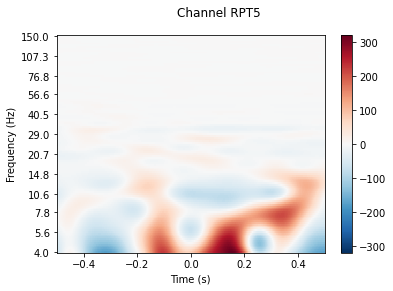

In [119]:
for ch_num in range(64):
    average_tfr.plot([ch_num], baseline=(-0.5, 0), mode='mean', title=f"Channel {average_tfr.ch_names[ch_num]}")